In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import data_info, load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_w6a
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from grid_search import run_solvers, run_bench, grid_search

C:\Users\Utente\AppData\Local\Temp\ipykernel_6000\3261090548.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
C = 0.5
sgd_steps = (1, 0.5, 0.1, 0.01, 0.001, 0.0005, 0.0001, 0.00005)
sgdd_steps = (1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0005)
sls_steps = (1, 0.1, 0.01, 0.005)
armijo_damps = (0.3, 0.5, 0.7, 0.9)
momentum_damps = (0.5, 0.7)

# w1a

In [3]:
# data_w1a = load_w1a()
data_info(load_w1a())

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Class distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}


In [4]:
Mw1a_grid = (32, 64)
for i in Mw1a_grid:
    print(f"Iterations: {load_w1a()[1].size / i}")

Iterations: 77.40625
Iterations: 38.703125


## Benchmark

In [5]:
benchw1a = run_bench(load_w1a(), C)

benchw1a_data = optim_bench(benchw1a)

## Fine-tuning

In [6]:
#batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)
batchfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), (load_w1a()[1].size,), sgd_steps, do_parallel=False)

{'batch': 2477, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 2.918717
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000564
Sol norm: 0.667389
Run-time (seconds): 0.010029
Epochs: 12


In [7]:
#sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)
sgdfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), Mw1a_grid, sgd_steps, n_jobs=7)
print("% ----- %")
#sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)
sgddecre_w1a1, _ = grid_search("SGD-Decreasing", C, load_w1a(), Mw1a_grid, sgdd_steps, n_jobs=7)
print("% ----- %")
#sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)
sgdm_w1a1, _ = grid_search("SGDM", C, load_w1a(), Mw1a_grid, sgd_steps, n_jobs=7)

{'batch': 32, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.802398
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000852
Sol norm: 0.667311
Run-time (seconds): 0.186510
Epochs: 27
% ----- %
{'batch': 64, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 9.273777
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000792
Sol norm: 0.667400
Run-time (seconds): 0.214942
Epochs: 27
% ----- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 18.272916
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000978
Sol norm: 0.667383
Run-time (seconds): 5.914988
Epochs: 386


In [8]:
#sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)
sgdarmijo_w1a1, _ = grid_search("SGD-Armijo", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=7)
print("% ------ %")
#mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)
mslc_w1a1, _ = grid_search("MSL-SGDM-C", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=7)
print("% ------ %")
#mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)
mslr_w1a1, _ = grid_search("MSL-SGDM-R", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=7)

{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 49.133868
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.9713995599932307
Objective function: 0.536467
Grad norm: 0.363829
Sol norm: 0.454883
Run-time (seconds): 7.664835
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.7}
Grid search run-time (seconds): 98.420749
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009149
Sol norm: 0.665656
Run-time (seconds): 6.388432
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 49.197551
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009144
Sol norm: 0.665659
Run-time (seconds): 6.497748
Epochs: 600


In [9]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,0.000046,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,0.000009,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,0.000023,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
3,SGD-Fixed,0.5,2477.0,1.000,0.0,0.464614,0.000564,0.010029,12,0.970933,0.970236,0.500000,0.500000,0.667389
5,SGD-Decreasing,0.5,64.0,0.500,0.0,0.464614,0.000792,0.214942,27,0.970933,0.970236,0.500000,0.500000,0.667400
4,SGD-Fixed,0.5,32.0,0.010,0.0,0.464615,0.000852,0.186510,27,0.970933,0.970236,0.500000,0.500000,0.667311
6,SGDM,0.5,32.0,0.010,0.9,0.464615,0.000978,5.914988,386,0.970933,0.970236,0.500000,0.500000,0.667383
9,MSL-SGDM-R,0.5,64.0,0.005,0.9,0.464693,0.009144,6.497748,600,0.970933,0.970236,0.500000,0.500000,0.665659
8,MSL-SGDM-C,0.5,64.0,0.005,0.9,0.464693,0.009149,6.388432,600,0.970933,0.970236,0.500000,0.500000,0.665656
7,SGD-Armijo,0.5,64.0,0.100,0.0,0.536467,0.363829,7.664835,600,0.973355,0.971400,0.541667,0.519545,0.454883


In [10]:
print(test_w1a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 6 & NaN & 0.464614 & 0.000046 & 0.970236 \\
CG & NaN & 7 & NaN & 0.464614 & 0.000009 & 0.970236 \\
L-BFGS-B & NaN & 7 & NaN & 0.464614 & 0.000023 & 0.970236 \\
SGD-Fixed & 1.000000 & 12 & 0.010029 & 0.464614 & 0.000564 & 0.970236 \\
SGD-Decreasing & 0.500000 & 27 & 0.214942 & 0.464614 & 0.000792 & 0.970236 \\
SGD-Fixed & 0.010000 & 27 & 0.186510 & 0.464615 & 0.000852 & 0.970236 \\
SGDM & 0.010000 & 386 & 5.914988 & 0.464615 & 0.000978 & 0.970236 \\
MSL-SGDM-R & 0.005000 & 600 & 6.497748 & 0.464693 & 0.009144 & 0.970236 \\
MSL-SGDM-C & 0.005000 & 600 & 6.388432 & 0.464693 & 0.009149 & 0.970236 \\
SGD-Armijo & 0.100000 & 600 & 7.664835 & 0.536467 & 0.363829 & 0.971400 \\
\bottomrule
\end{tabular}



## SGD

In [6]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, load_w1a(), load_w1a()[1].size, do_parallel=False)

Run-time (seconds): 0.320809


In [7]:
# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, load_w1a(), 32, do_parallel=False)
# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, load_w1a(), 64, do_parallel=False)
# SGDM
sgdm_w1a = run_solvers("SGDM", C, load_w1a(), 32, do_parallel=False)

Run-time (seconds): 3.456151
Run-time (seconds): 1.876221
Run-time (seconds): 3.430077


In [8]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, load_w1a(), 64, delta_a=0.5, do_parallel=False)
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, load_w1a(), 64, delta_a=0.9, delta_m=0.7, do_parallel=False)
# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, load_w1a(), 64, delta_a=0.9, do_parallel=False)

Run-time (seconds): 2.729890
Run-time (seconds): 2.625140
Run-time (seconds): 2.624928


In [9]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [10]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2477.0,1.00,0.0,0.464614,2.987466e-16,0.091967,200,0.970933,0.970236,0.500000,0.500000,0.667394
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.464614,3.391915e-05,0.589755,200,0.970933,0.970236,0.500000,0.500000,0.667403
4,SGD-Fixed,0.5,2477.0,0.10,0.0,0.464614,8.167528e-05,0.080485,200,0.970933,0.970236,0.500000,0.500000,0.667393
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.464614,1.362337e-04,0.613273,200,0.970933,0.970236,0.500000,0.500000,0.667415
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.464615,9.837897e-04,1.121969,200,0.970933,0.970236,0.500000,0.500000,0.667700
13,SGDM,0.5,32.0,0.10,0.9,0.464616,1.427547e-03,1.137600,200,0.970933,0.970236,0.500000,0.500000,0.667781
12,SGDM,0.5,32.0,1.00,0.9,0.464762,1.268830e-02,1.132080,200,0.970933,0.970236,0.500000,0.500000,0.672487


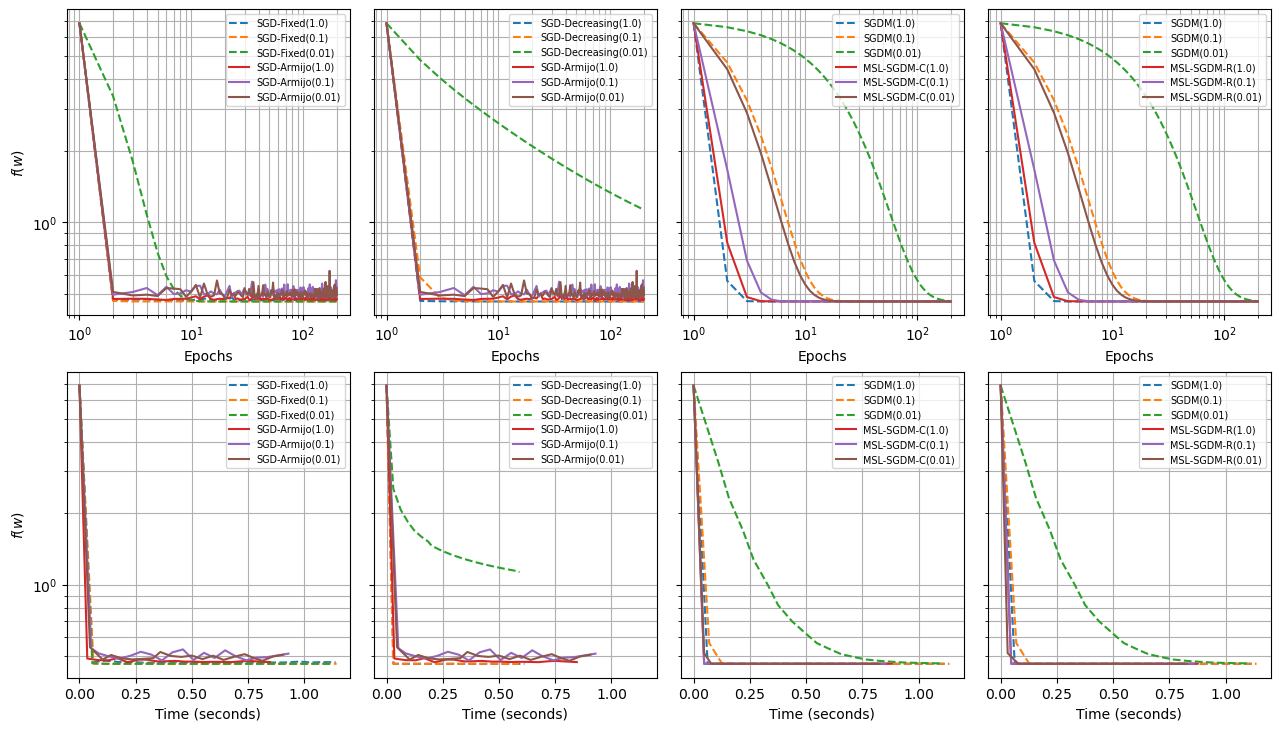

In [11]:
diagnostic([sgdfixed_w1a, sgddecre_w1a, sgdm_w1a, sgdarmijo_w1a, mslc_w1a, mslr_w1a])
plt.savefig("./plots/w1a-diagnostic.pdf")

# w3a

In [12]:
data_info(load_w3a())

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Class distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}


In [13]:
Mw3a_grid = (64, 128)
for i in Mw3a_grid:
    print(f"Iterations: {load_w3a()[1].size / i}")

Iterations: 76.75
Iterations: 38.375


## Benchmark

In [14]:
benchw3a = run_bench(load_w3a(), C)

benchw3a_data = optim_bench(benchw3a)

## Fine-tuning

In [15]:
batchfixed_w3a1, _ = grid_search("SGD-Fixed", C, load_w3a(), (load_w3a()[1].size,), sgd_steps)

{'batch': 4912, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.380633
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462742
Grad norm: 0.000564
Sol norm: 0.666635
Run-time (seconds): 0.016491
Epochs: 12


In [16]:
sgdfixed_w3a1, _ = grid_search("SGD-Fixed", C, load_w3a(), Mw3a_grid, sgd_steps)
print("% ----- %")
sgddecre_w3a1, _ = grid_search("SGD-Decreasing", C, load_w3a(), Mw3a_grid, sgdd_steps)
print("% ----- %")
sgdm_w3a1, _ = grid_search("SGDM", C, load_w3a(), Mw3a_grid, sgd_steps)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.582412
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000949
Sol norm: 0.666893
Run-time (seconds): 0.162157
Epochs: 23
% ----- %
{'batch': 128, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 4.612137
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000876
Sol norm: 0.666731
Run-time (seconds): 0.081762
Epochs: 19
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.817542
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000895
Sol norm: 0.666594
Run-time (seconds): 0.351333
Epochs: 45


In [18]:
sgdarmijo_w3a1, _ = grid_search("SGD-Armijo", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_w3a1, _ = grid_search("MSL-SGDM-C", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_w3a1, _ = grid_search("MSL-SGDM-R", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 24.596127
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.9710060887213685
Objective function: 0.500431
Grad norm: 0.268456
Sol norm: 0.478986
Run-time (seconds): 6.851229
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.5}
Grid search run-time (seconds): 58.367386
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.9702031804090372
Objective function: 0.462787
Grad norm: 0.006924
Sol norm: 0.667576
Run-time (seconds): 4.021617
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 30.399145
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.9702031804090372
Objective function: 0.462787
Grad norm: 0.006924
Sol norm: 0.667576
Run-time (seconds): 4.124630
Epochs: 600


In [19]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,0.000011,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,0.000022,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,0.000033,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
3,SGD-Fixed,0.5,4912.0,1.000,0.0,0.462742,0.000564,0.016491,12,0.970888,0.970203,0.500000,0.500000,0.666635
5,SGD-Decreasing,0.5,128.0,0.500,0.0,0.462743,0.000876,0.081762,19,0.970888,0.970203,0.500000,0.500000,0.666731
4,SGD-Fixed,0.5,64.0,0.010,0.0,0.462743,0.000949,0.162157,23,0.970888,0.970203,0.500000,0.500000,0.666893
6,SGDM,0.5,64.0,0.100,0.9,0.462743,0.000895,0.351333,45,0.970888,0.970203,0.500000,0.500000,0.666594
8,MSL-SGDM-C,0.5,128.0,0.005,0.9,0.462787,0.006924,4.021617,600,0.970888,0.970203,0.500000,0.500000,0.667576
9,MSL-SGDM-R,0.5,128.0,0.005,0.9,0.462787,0.006924,4.124630,600,0.970888,0.970203,0.500000,0.500000,0.667576
7,SGD-Armijo,0.5,64.0,0.010,0.0,0.500431,0.268456,6.851229,600,0.971702,0.971006,0.513986,0.513473,0.478986


In [20]:
print(test_w3a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 6 & NaN & 0.462742 & 0.000011 & 0.970203 \\
CG & NaN & 7 & NaN & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & NaN & 7 & NaN & 0.462742 & 0.000033 & 0.970203 \\
SGD-Fixed & 1.000000 & 12 & 0.016491 & 0.462742 & 0.000564 & 0.970203 \\
SGD-Decreasing & 0.500000 & 19 & 0.081762 & 0.462743 & 0.000876 & 0.970203 \\
SGD-Fixed & 0.010000 & 23 & 0.162157 & 0.462743 & 0.000949 & 0.970203 \\
SGDM & 0.100000 & 45 & 0.351333 & 0.462743 & 0.000895 & 0.970203 \\
MSL-SGDM-C & 0.005000 & 600 & 4.021617 & 0.462787 & 0.006924 & 0.970203 \\
MSL-SGDM-R & 0.005000 & 600 & 4.124630 & 0.462787 & 0.006924 & 0.970203 \\
SGD-Armijo & 0.010000 & 600 & 6.851229 & 0.500431 & 0.268456 & 0.971006 \\
\bottomrule
\end{tabular}



## SGD

In [21]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, load_w3a(), load_w3a()[1].size)

Run-time (seconds): 0.503351


In [22]:
# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, load_w3a(), 64)
# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, load_w3a(), 128)
# SGDM
sgdm_w3a = run_solvers("SGDM", C, load_w3a(), 64)

Run-time (seconds): 3.657442
Run-time (seconds): 2.076821
Run-time (seconds): 3.595944


In [23]:
# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, load_w3a(), 64, delta_a=0.3)
# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, load_w3a(), 128, delta_a=0.9, delta_m=0.5)
# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, load_w3a(), 128, delta_a=0.9)

Run-time (seconds): 5.100705
Run-time (seconds): 2.953333
Run-time (seconds): 2.951020


In [24]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [25]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,1.468397e-16,0.138247,200,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.462742,3.243414e-05,0.669518,200,0.970888,0.970203,0.500000,0.500000,0.666647
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.462742,8.337571e-05,0.681427,200,0.970888,0.970203,0.500000,0.500000,0.666662
4,SGD-Fixed,0.5,4912.0,0.10,0.0,0.462742,8.164157e-05,0.131162,200,0.970888,0.970203,0.500000,0.500000,0.666639
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.462742,6.384729e-04,1.196832,200,0.970888,0.970203,0.500000,0.500000,0.666490
13,SGDM,0.5,64.0,0.10,0.9,0.462743,1.069982e-03,1.187193,200,0.970888,0.970203,0.500000,0.500000,0.666326
20,MSL-SGDM-C,0.5,128.0,0.01,0.9,0.462848,1.058395e-02,0.929430,200,0.970888,0.970203,0.500000,0.500000,0.665931


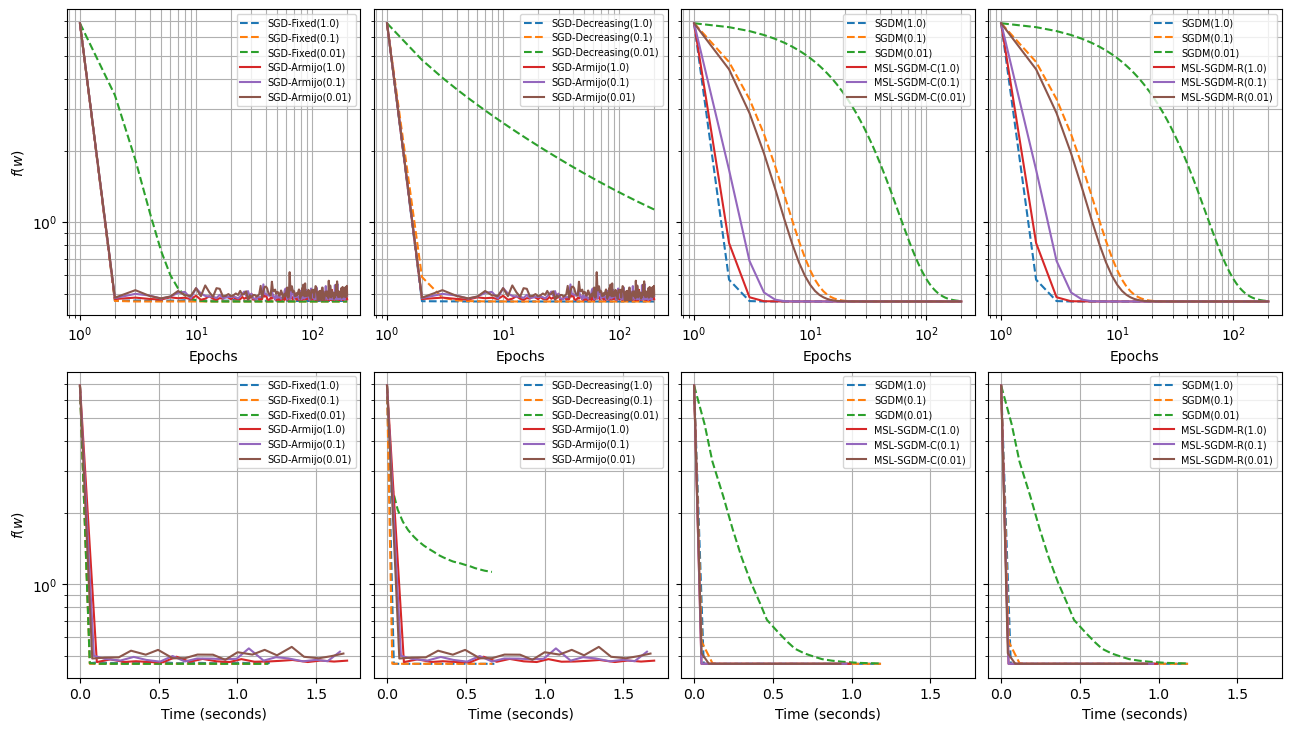

In [26]:
diagnostic([sgdfixed_w3a, sgddecre_w3a, sgdm_w3a, sgdarmijo_w3a, mslc_w3a, mslr_w3a])
plt.savefig("./plots/w3a-diagnostic.pdf")

# Phishing

In [27]:
data_info(load_phishing())

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}


In [28]:
Mphish_grid = (64, 128)
for i in Mphish_grid:
    print(f"Iterations: {load_phishing()[1].size / i}")

Iterations: 138.1875
Iterations: 69.09375


## Benchmark

In [29]:
benchphish = run_bench(load_phishing(), C)

benchphish_data = optim_bench(benchphish)

## Fine-tuning

In [30]:
batchfixed_phish1, _ = grid_search("SGD-Fixed", C, load_phishing(), (load_phishing()[1].size,), sgd_steps)

{'batch': 8844, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 2.529064
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000534
Sol norm: 0.164001
Run-time (seconds): 0.055085
Epochs: 11


In [31]:
sgdfixed_phish1, _ = grid_search("SGD-Fixed", C, load_phishing(), Mphish_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_phish1, _ = grid_search("SGD-Decreasing", C, load_phishing(), Mphish_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_phish1, _ = grid_search("SGDM", C, load_phishing(), Mphish_grid, sgd_steps, n_jobs=8)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 11.898497
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000927
Sol norm: 0.163727
Run-time (seconds): 0.173696
Epochs: 13
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.448453
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000508
Sol norm: 0.164270
Run-time (seconds): 0.040321
Epochs: 6
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 12.260912
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000575
Sol norm: 0.163872
Run-time (seconds): 0.271079
Epochs: 22


In [32]:
sgdarmijo_phish1, _ = grid_search("SGD-Armijo", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_phish1, _ = grid_search("MSL-SGDM-C", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_phish1, _ = grid_search("MSL-SGDM-R", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 128, 'alpha': 0.005, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 49.553540
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.8652193577566711
Objective function: 0.687736
Grad norm: 0.066541
Sol norm: 0.144155
Run-time (seconds): 7.578606
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.5}
Grid search run-time (seconds): 121.304130
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.5689733152419719
Objective function: 0.685705
Grad norm: 0.032668
Sol norm: 0.153636
Run-time (seconds): 9.598539
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 60.822083
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.5685210312075983
Objective function: 0.685660
Grad norm: 0.032621
Sol norm: 0.152190
Run-time (seconds): 17.498211
Epochs: 600


In [33]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
5,SGD-Decreasing,0.5,128.0,0.100,0.0,0.685065,5.077752e-04,0.040321,6,0.554274,0.567616,0.500000,0.500000,0.164270
6,SGDM,0.5,64.0,0.100,0.9,0.685065,5.749916e-04,0.271079,22,0.554274,0.567616,0.500000,0.500000,0.163872
3,SGD-Fixed,0.5,8844.0,1.000,0.0,0.685065,5.343408e-04,0.055085,11,0.554274,0.567616,0.500000,0.500000,0.164001
4,SGD-Fixed,0.5,64.0,0.010,0.0,0.685065,9.272841e-04,0.173696,13,0.554274,0.567616,0.500000,0.500000,0.163727
9,MSL-SGDM-R,0.5,64.0,0.100,0.9,0.685660,3.262091e-02,17.498211,600,0.555631,0.568521,0.501522,0.501046,0.152190
8,MSL-SGDM-C,0.5,128.0,1.000,0.9,0.685705,3.266777e-02,9.598539,600,0.558005,0.568973,0.504186,0.501569,0.153636
7,SGD-Armijo,0.5,128.0,0.005,0.0,0.687736,6.654144e-02,7.578606,600,0.860357,0.865219,0.847576,0.848254,0.144155


In [34]:
print(test_phish[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & NaN & 5 & NaN & 0.685065 & 0.000008 & 0.567616 \\
CG & NaN & 6 & NaN & 0.685065 & 0.000023 & 0.567616 \\
SGD-Decreasing & 0.100000 & 6 & 0.040321 & 0.685065 & 0.000508 & 0.567616 \\
SGDM & 0.100000 & 22 & 0.271079 & 0.685065 & 0.000575 & 0.567616 \\
SGD-Fixed & 1.000000 & 11 & 0.055085 & 0.685065 & 0.000534 & 0.567616 \\
SGD-Fixed & 0.010000 & 13 & 0.173696 & 0.685065 & 0.000927 & 0.567616 \\
MSL-SGDM-R & 0.100000 & 600 & 17.498211 & 0.685660 & 0.032621 & 0.568521 \\
MSL-SGDM-C & 1.000000 & 600 & 9.598539 & 0.685705 & 0.032668 & 0.568973 \\
SGD-Armijo & 0.005000 & 600 & 7.578606 & 0.687736 & 0.066541 & 0.865219 \\
\bottomrule
\end{tabular}



## SGD

In [35]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, load_phishing(), load_phishing()[1].size)

Run-time (seconds): 1.084610


In [36]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, load_phishing(), 64)
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, load_phishing(), 128)
# SGDM
sgdm_phish = run_solvers("SGDM", C, load_phishing(), 64)

Run-time (seconds): 6.342789
Run-time (seconds): 3.556104
Run-time (seconds): 6.283926


In [37]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, load_phishing(), 128, delta_a=0.5)
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, load_phishing(), 128, delta_a=0.5)
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, load_phishing(), 64, delta_a=0.9)

Run-time (seconds): 5.232109
Run-time (seconds): 5.695338
Run-time (seconds): 10.240139


In [38]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [39]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,1.423659e-16,0.365156,200,0.554274,0.567616,0.500000,0.500000,0.164188
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,2.749052e-06,1.164856,200,0.554274,0.567616,0.500000,0.500000,0.164190
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
4,SGD-Fixed,0.5,8844.0,0.10,0.0,0.685065,3.840453e-05,0.347242,200,0.554274,0.567616,0.500000,0.500000,0.164175
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.685065,1.780320e-04,1.199794,200,0.554274,0.567616,0.500000,0.500000,0.164100
16,SGDM,0.5,64.0,0.10,0.9,0.685065,6.247825e-04,2.083370,200,0.554274,0.567616,0.500000,0.500000,0.164484
17,SGDM,0.5,64.0,0.01,0.9,0.685065,7.669520e-04,2.100374,200,0.554274,0.567616,0.500000,0.500000,0.163967
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.685066,1.361003e-03,2.127744,200,0.554274,0.567616,0.500000,0.500000,0.163501


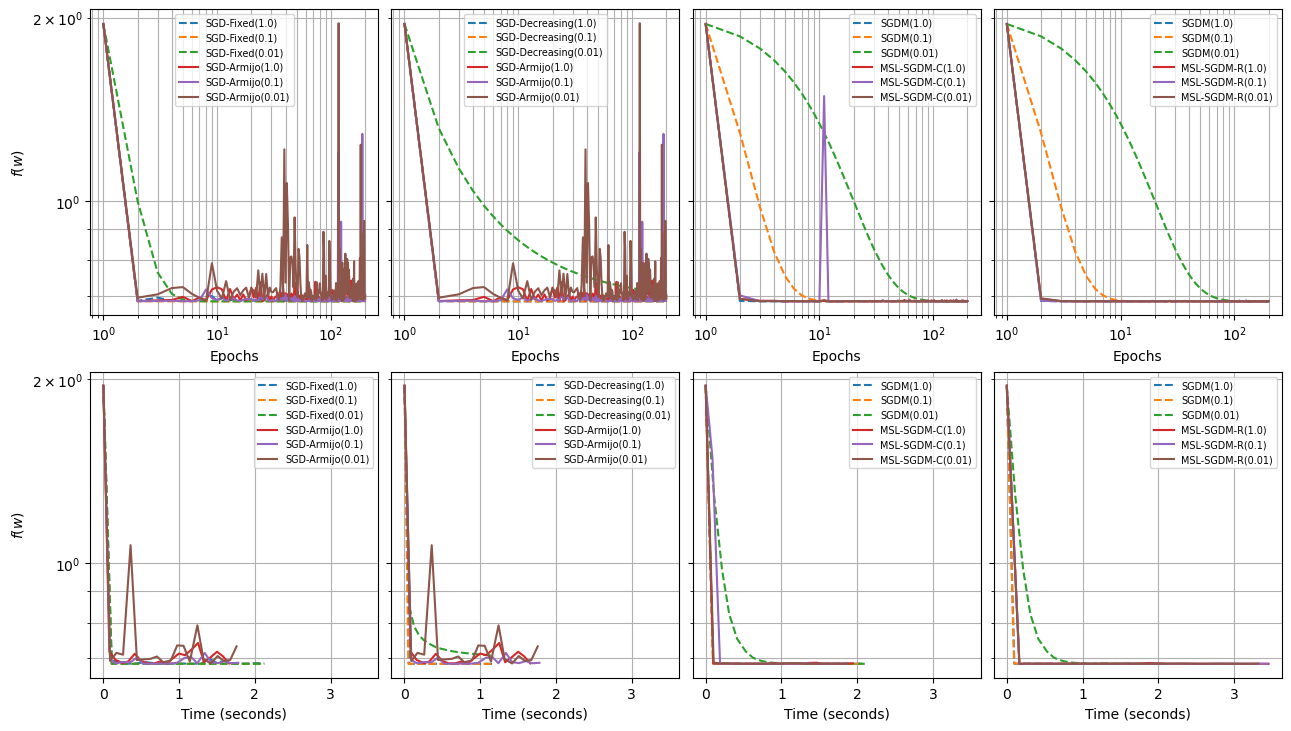

In [40]:
diagnostic([sgdfixed_phish, sgddecre_phish, sgdm_phish, sgdarmijo_phish, mslc_phish, mslr_phish])
plt.savefig("./plots/phish-diagnostic.pdf")

# a2a

In [41]:
data_info(load_a2a())

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Class distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}


In [43]:
Ma2a_grid = (32, 64)
for i in Ma2a_grid:
    print(f"Iterations: {load_a2a()[1].size / i}")

Iterations: 70.78125
Iterations: 35.390625


## Benchmark

In [44]:
bencha2a = run_bench(load_a2a(), C)

bencha2a_data = optim_bench(bencha2a)

## Fine-tuning

In [45]:
batchfixed_a2a1, _ = grid_search("SGD-Fixed", C, load_a2a(), (load_a2a()[1].size,), sgd_steps)

{'batch': 2265, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.421901
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.8223857935040929
Objective function: 0.594416
Grad norm: 0.363976
Sol norm: 0.355752
Run-time (seconds): 0.260017
Epochs: 600


In [46]:
sgdfixed_a2a1, _ = grid_search("SGD-Fixed", C, load_a2a(), Ma2a_grid, sgd_steps)
print("% ------- %")
sgddecre_a2a1, _ = grid_search("SGD-Decreasing", C, load_a2a(), Ma2a_grid, sgdd_steps)
print("% ------- %")
sgdm_a2a1, _ = grid_search("SGDM", C, load_a2a(), Ma2a_grid, sgd_steps)

{'batch': 32, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 6.745227
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.8071362556113019
Objective function: 0.602741
Grad norm: 0.356183
Sol norm: 0.425177
Run-time (seconds): 4.331557
Epochs: 600
% ------- %
{'batch': 64, 'alpha': 0.8, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 4.199663
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000726
Sol norm: 0.438522
Run-time (seconds): 0.183221
Epochs: 59
% ------- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.476199
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.7602983892263006
Objective function: 0.564030
Grad norm: 0.002628
Sol norm: 0.438444
Run-time (seconds): 1.873068
Epochs: 600


In [47]:
sgdarmijo_a2a1, _ = grid_search("SGD-Armijo", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps)
print("% ------- %")
mslc_a2a1, _ = grid_search("MSL-SGDM-C", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ------- %")
mslr_a2a1, _ = grid_search("MSL-SGDM-R", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps)

{'batch': 32, 'alpha': 1, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 24.198058
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.7989173488249274
Objective function: 0.617908
Grad norm: 0.433035
Sol norm: 0.436962
Run-time (seconds): 6.068792
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.5}
Grid search run-time (seconds): 54.326824
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.7893451280697121
Objective function: 0.579879
Grad norm: 0.229332
Sol norm: 0.414654
Run-time (seconds): 7.482898
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 28.276247
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.7902363348296805
Objective function: 0.577575
Grad norm: 0.228297
Sol norm: 0.413366
Run-time (seconds): 7.889470
Epochs: 600


In [48]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
5,SGD-Decreasing,0.5,64.0,0.80,0.0,0.564028,0.000726,0.183221,59,0.748344,0.760265,0.501748,0.500413,0.438522
6,SGDM,0.5,64.0,0.10,0.9,0.564030,0.002628,1.873068,600,0.748344,0.760298,0.501748,0.500481,0.438444
9,MSL-SGDM-R,0.5,32.0,0.01,0.9,0.577575,0.228297,7.889470,600,0.780574,0.790236,0.573084,0.572237,0.413366
8,MSL-SGDM-C,0.5,32.0,0.01,0.9,0.579879,0.229332,7.482898,600,0.778366,0.789345,0.571028,0.571274,0.414654
3,SGD-Fixed,0.5,2265.0,1.00,0.0,0.594416,0.363976,0.260017,600,0.805740,0.822386,0.661688,0.678397,0.355752
4,SGD-Fixed,0.5,32.0,1.00,0.0,0.602741,0.356183,4.331557,600,0.788079,0.807136,0.640035,0.659046,0.425177
7,SGD-Armijo,0.5,32.0,1.00,0.0,0.617908,0.433035,6.068792,600,0.788962,0.798917,0.700820,0.709748,0.436962


In [49]:
print(test_a2a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.564027 & 0.000004 & 0.760265 \\
CG & NaN & 12 & NaN & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & NaN & 8 & NaN & 0.564027 & 0.000012 & 0.760265 \\
SGD-Decreasing & 0.800000 & 59 & 0.183221 & 0.564028 & 0.000726 & 0.760265 \\
SGDM & 0.100000 & 600 & 1.873068 & 0.564030 & 0.002628 & 0.760298 \\
MSL-SGDM-R & 0.010000 & 600 & 7.889470 & 0.577575 & 0.228297 & 0.790236 \\
MSL-SGDM-C & 0.010000 & 600 & 7.482898 & 0.579879 & 0.229332 & 0.789345 \\
SGD-Fixed & 1.000000 & 600 & 0.260017 & 0.594416 & 0.363976 & 0.822386 \\
SGD-Fixed & 1.000000 & 600 & 4.331557 & 0.602741 & 0.356183 & 0.807136 \\
SGD-Armijo & 1.000000 & 600 & 6.068792 & 0.617908 & 0.433035 & 0.798917 \\
\bottomrule
\end{tabular}



## SGD

In [51]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, load_a2a(), load_a2a()[1].size)

Run-time (seconds): 0.244231


In [52]:
# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, load_a2a(), 32)
# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, load_a2a(), 64)
# SGDM
sgdm_a2a = run_solvers("SGDM", C, load_a2a(), 64)

Run-time (seconds): 3.008184
Run-time (seconds): 1.615759
Run-time (seconds): 1.621347


In [53]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, load_a2a(), 32, delta_a=0.5)
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, load_a2a(), 32, delta_a=0.3, delta_m=0.5)
# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, load_a2a(), 32, delta_a=0.3)

Run-time (seconds): 5.032431
Run-time (seconds): 4.877127
Run-time (seconds): 4.756725


In [54]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [55]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
4,SGD-Fixed,0.5,2265.0,0.10,0.0,0.564027,0.000046,0.064738,200,0.748344,0.760265,0.501748,0.500413,0.438971
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.564027,0.000063,0.509666,200,0.748344,0.760265,0.501748,0.500413,0.438957
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.564027,0.000794,0.535604,200,0.748344,0.760265,0.501748,0.500413,0.439149
13,SGDM,0.5,64.0,0.10,0.9,0.564032,0.002789,0.515566,200,0.748344,0.760265,0.501748,0.500413,0.438941
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.564040,0.007099,0.983674,200,0.748344,0.760265,0.501748,0.500413,0.440964
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.564559,0.025339,0.986980,200,0.748344,0.760331,0.501748,0.500597,0.436755
12,SGDM,0.5,64.0,1.00,0.9,0.564561,0.040900,0.526321,200,0.748344,0.760430,0.501748,0.500851,0.424396


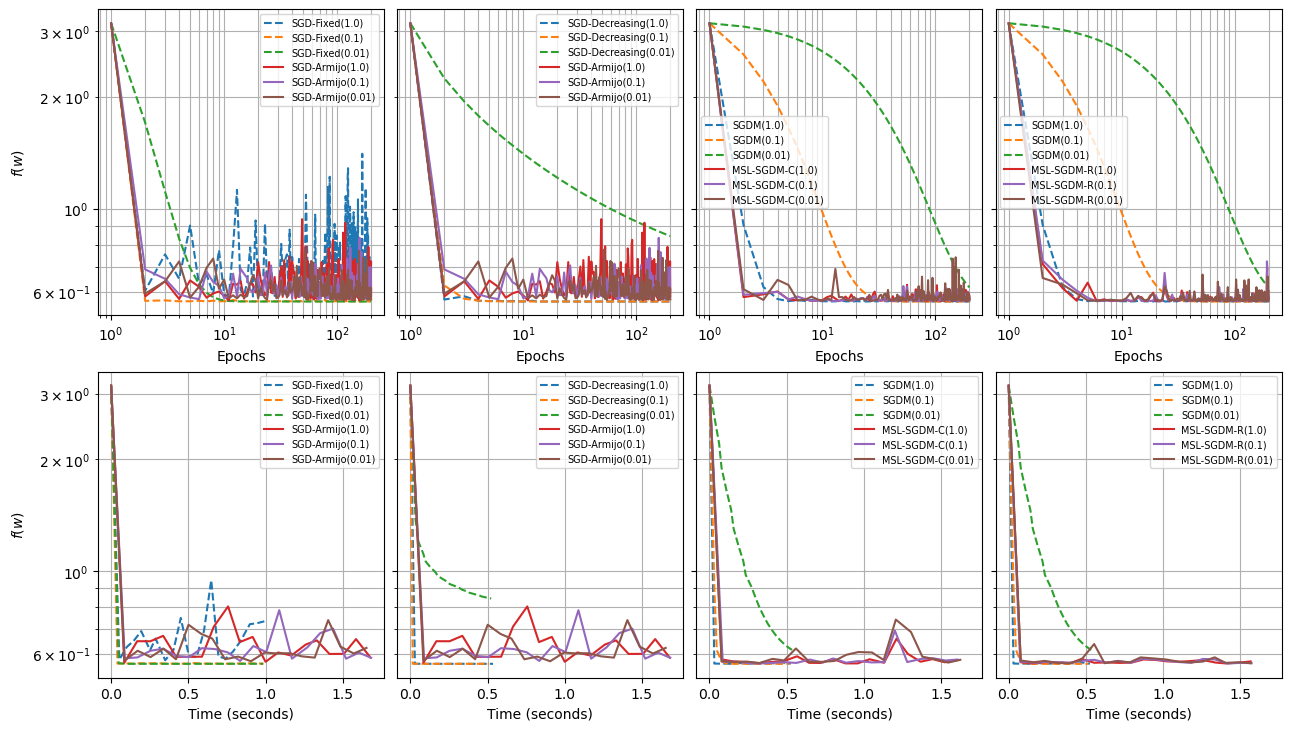

In [57]:
diagnostic([sgdfixed_a2a, sgddecre_a2a, sgdm_a2a, sgdarmijo_a2a, mslc_a2a, mslr_a2a]),
plt.savefig("./plots/a2a-diagnostic.pdf")

# Mushrooms

In [58]:
data_info(load_mushrooms())

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [59]:
Mmush_grid = (64, 128)
for i in Mmush_grid:
    print(f"Iterations: {load_mushrooms()[1].size / i}")

Iterations: 101.546875
Iterations: 50.7734375


## Benchmark

In [60]:
benchMush = run_bench(load_mushrooms(), C)

benchMush_data = optim_bench(benchMush)

## Fine-tuning

In [61]:
batchfixed_mush1, _ = grid_search("SGD-Fixed", C, load_mushrooms(), (load_mushrooms()[1].size,), sgd_steps)

{'batch': 6499, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.265692
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000757
Sol norm: 0.635906
Run-time (seconds): 0.059922
Epochs: 26


In [62]:
sgdfixed_mush1, _ = grid_search("SGD-Fixed", C, load_mushrooms(), Mmush_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_mush1, _ = grid_search("SGD-Decreasing", C, load_mushrooms(), Mmush_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_mush1, _ = grid_search("SGDM", C, load_mushrooms(), Mmush_grid, sgd_steps, n_jobs=8)

{'batch': 128, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 8.999274
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.9261538461538461
Objective function: 0.525499
Grad norm: 0.199874
Sol norm: 0.646431
Run-time (seconds): 2.993838
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.717184
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.8935384615384615
Objective function: 0.517727
Grad norm: 0.000779
Sol norm: 0.635898
Run-time (seconds): 0.533000
Epochs: 26
% ----- %
{'batch': 128, 'alpha': 1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 10.054101
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.9243076923076923
Objective function: 0.557069
Grad norm: 0.479065
Sol norm: 0.658660
Run-time (seconds): 4.369383
Epochs: 600


In [63]:
sgdarmijo_mush1, _ = grid_search("SGD-Armijo", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_mush1, _ = grid_search("MSL-SGDM-C", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_mush1, _ = grid_search("MSL-SGDM-R", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 38.473041
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.9532307692307692
Objective function: 0.535765
Grad norm: 0.233549
Sol norm: 0.644938
Run-time (seconds): 11.367419
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.5}
Grid search run-time (seconds): 85.693469
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.9396923076923077
Objective function: 0.527262
Grad norm: 0.223900
Sol norm: 0.649508
Run-time (seconds): 13.411705
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0}
Grid search run-time (seconds): 43.665751
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.9403076923076923
Objective function: 0.527069
Grad norm: 0.232121
Sol norm: 0.642551
Run-time (seconds): 7.885503
Epochs: 600


In [64]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
5,SGD-Decreasing,0.5,64.0,0.1,0.0,0.517727,0.000779,0.533000,26,0.895676,0.893538,0.892565,0.890219,0.635898
3,SGD-Fixed,0.5,6499.0,0.5,0.0,0.517727,0.000757,0.059922,26,0.895369,0.892923,0.892246,0.889580,0.635906
4,SGD-Fixed,0.5,128.0,0.5,0.0,0.525499,0.199874,2.993838,600,0.933220,0.926154,0.931701,0.924477,0.646431
9,MSL-SGDM-R,0.5,128.0,0.1,0.9,0.527069,0.232121,7.885503,600,0.947684,0.940308,0.946972,0.939506,0.642551
8,MSL-SGDM-C,0.5,64.0,0.1,0.9,0.527262,0.223900,13.411705,600,0.949069,0.939692,0.948265,0.938821,0.649508
7,SGD-Armijo,0.5,64.0,0.1,0.0,0.535765,0.233549,11.367419,600,0.957378,0.953231,0.957417,0.953396,0.644938
6,SGDM,0.5,128.0,1.0,0.9,0.557069,0.479065,4.369383,600,0.935990,0.924308,0.937475,0.926352,0.658660


In [65]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.517726 & 0.000003 & 0.892923 \\
CG & NaN & 11 & NaN & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & NaN & 10 & NaN & 0.517726 & 0.000017 & 0.892923 \\
SGD-Decreasing & 0.100000 & 26 & 0.533000 & 0.517727 & 0.000779 & 0.893538 \\
SGD-Fixed & 0.500000 & 26 & 0.059922 & 0.517727 & 0.000757 & 0.892923 \\
SGD-Fixed & 0.500000 & 600 & 2.993838 & 0.525499 & 0.199874 & 0.926154 \\
MSL-SGDM-R & 0.100000 & 600 & 7.885503 & 0.527069 & 0.232121 & 0.940308 \\
MSL-SGDM-C & 0.100000 & 600 & 13.411705 & 0.527262 & 0.223900 & 0.939692 \\
SGD-Armijo & 0.100000 & 600 & 11.367419 & 0.535765 & 0.233549 & 0.953231 \\
SGDM & 1.000000 & 600 & 4.369383 & 0.557069 & 0.479065 & 0.924308 \\
\bottomrule
\end{tabular}



## SGD

In [66]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, load_mushrooms(), load_mushrooms()[1].size)

Run-time (seconds): 0.650438


In [67]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, load_mushrooms(), 128)
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, load_mushrooms(), 64)
# SGDM
sgdm_mush = run_solvers("SGDM", C, load_mushrooms(), 128)

Run-time (seconds): 2.580331
Run-time (seconds): 4.524283
Run-time (seconds): 2.546734


In [68]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, load_mushrooms(), 64, delta_a=0.5)
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, load_mushrooms(), 64, delta_a=0.7, delta_m=0.5)
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, load_mushrooms(), 128, delta_a=0.7)

Run-time (seconds): 7.641483
Run-time (seconds): 7.623447
Run-time (seconds): 4.222952


In [69]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [70]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
4,SGD-Fixed,0.5,6499.0,0.10,0.0,0.517726,0.000046,0.203572,200,0.895522,0.892923,0.892406,0.889580,0.635932
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.517726,0.000112,1.485523,200,0.895522,0.892923,0.892406,0.889580,0.635950
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.517727,0.002024,0.843389,200,0.895215,0.892923,0.892087,0.889580,0.636349
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.517727,0.002026,1.519188,200,0.895215,0.892308,0.892087,0.888940,0.636367
13,SGDM,0.5,128.0,0.10,0.9,0.517738,0.008058,0.868755,200,0.896138,0.894769,0.893077,0.891498,0.635850
12,SGDM,0.5,128.0,1.00,0.9,0.517911,0.027192,0.840400,200,0.898292,0.897231,0.895332,0.894055,0.637874
7,SGD-Fixed,0.5,128.0,0.10,0.0,0.517936,0.027047,0.852567,200,0.896753,0.894154,0.893737,0.890905,0.641649


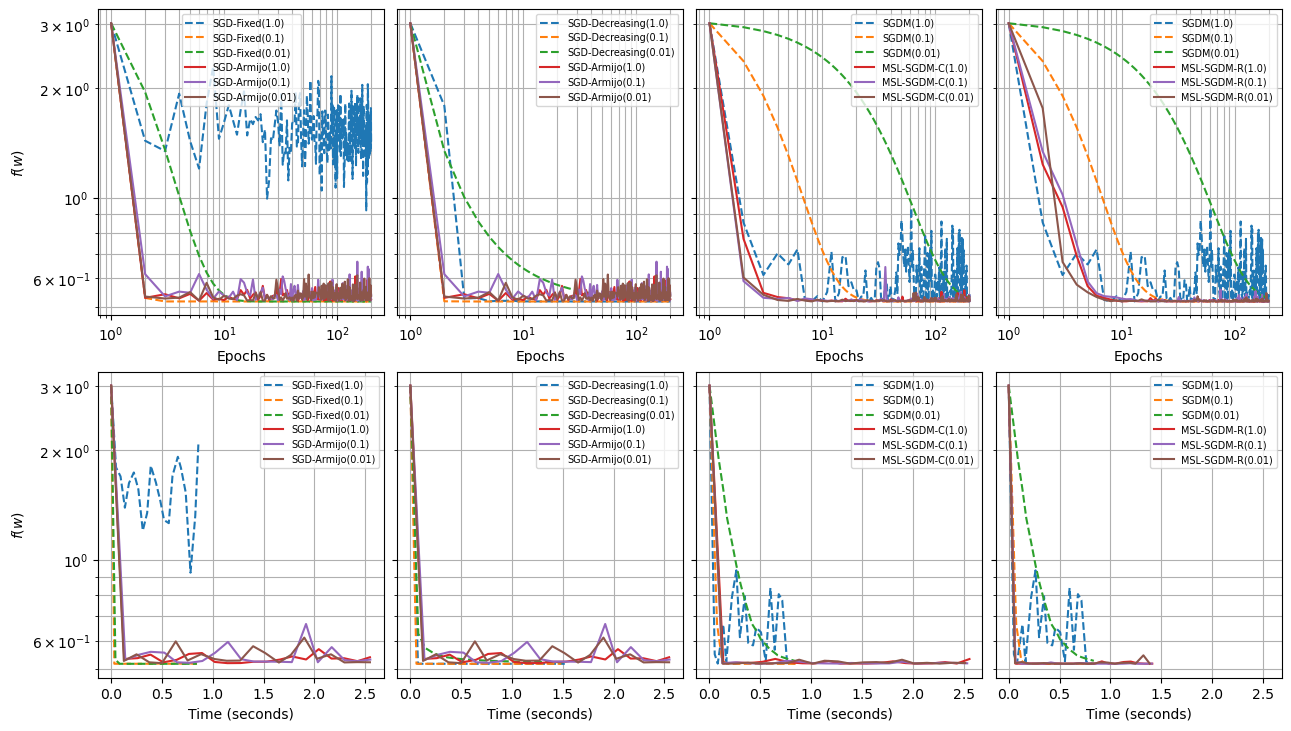

In [71]:
diagnostic([sgdfixed_mush, sgddecre_mush, sgdm_mush, sgdarmijo_mush, mslc_mush, mslr_mush]),
plt.savefig("./plots/mush-diagnostic.pdf")

# German

In [72]:
data_info(load_german())

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}


In [73]:
Mgerman_grid = (16, 32)
for i in Mgerman_grid:
    print(f"Iterations: {load_german()[1].size / i}")

Iterations: 50.0
Iterations: 25.0


## Benchmark

In [74]:
benchgerman = run_bench(load_german(), C)

benchgerman_data = optim_bench(benchgerman)

## Fine-tuning

In [75]:
batchfixed_german1, _ = grid_search("SGD-Fixed", C, load_german(), (load_german()[1].size,), sgd_steps)

{'batch': 800, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.351926
Number of combinations analyzed: 8
-----
Solver: SGD-Fixed
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000882
Sol norm: 0.358324
Run-time (seconds): 0.011878
Epochs: 20


In [76]:
sgdfixed_german1, _ = grid_search("SGD-Fixed", C, load_german(), Mgerman_grid, sgdd_steps)
print("% ----- %")
sgddecre_german1, _ = grid_search("SGD-Decreasing", C, load_german(), Mgerman_grid, sgd_steps)
print("% ----- %")
sgdm_german1, _ = grid_search("SGDM", C, load_german(), Mgerman_grid, sgd_steps)

{'batch': 32, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.104823
Number of combinations analyzed: 16
-----
Solver: SGD-Fixed
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000775
Sol norm: 0.358359
Run-time (seconds): 0.129290
Epochs: 58
% ----- %
{'batch': 16, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.784629
Number of combinations analyzed: 16
-----
Solver: SGD-Decreasing
Test score: 0.72
Objective function: 0.607993
Grad norm: 0.113583
Sol norm: 0.348660
Run-time (seconds): 2.867500
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.225124
Number of combinations analyzed: 16
-----
Solver: SGDM
Test score: 0.745
Objective function: 0.616375
Grad norm: 0.313714
Sol norm: 0.313661
Run-time (seconds): 2.522513
Epochs: 600


In [77]:
sgdarmijo_german1, _ = grid_search("SGD-Armijo", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_german1, _ = grid_search("MSL-SGDM-C", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_german1, _ = grid_search("MSL-SGDM-R", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps)

{'batch': 32, 'alpha': 0.1, 'beta': 0, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 17.880944
Number of combinations analyzed: 32
-----
Solver: SGD-Armijo
Test score: 0.74
Objective function: 0.614589
Grad norm: 0.229813
Sol norm: 0.408808
Run-time (seconds): 2.484220
Epochs: 600
% ----- %
{'batch': 32, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.5}
Grid search run-time (seconds): 41.230934
Number of combinations analyzed: 64
-----
Solver: MSL-SGDM-C
Test score: 0.735
Objective function: 0.607466
Grad norm: 0.140436
Sol norm: 0.369132
Run-time (seconds): 2.861868
Epochs: 600
% ----- %
{'batch': 32, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 20.737299
Number of combinations analyzed: 32
-----
Solver: MSL-SGDM-R
Test score: 0.71
Objective function: 0.597456
Grad norm: 0.023193
Sol norm: 0.365549
Run-time (seconds): 2.221751
Epochs: 600


In [78]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,32.0,0.010,0.0,0.597303,0.000775,0.129290,58,0.70375,0.710,0.511839,0.513403,0.358359
3,SGD-Fixed,0.5,800.0,0.500,0.0,0.597303,0.000882,0.011878,20,0.70375,0.710,0.511839,0.513403,0.358324
9,MSL-SGDM-R,0.5,32.0,0.005,0.9,0.597456,0.023193,2.221751,600,0.70500,0.710,0.513914,0.513403,0.365549
8,MSL-SGDM-C,0.5,32.0,0.005,0.9,0.607466,0.140436,2.861868,600,0.72500,0.735,0.560092,0.580418,0.369132
5,SGD-Decreasing,0.5,16.0,0.010,0.0,0.607993,0.113583,2.867500,600,0.70500,0.720,0.511554,0.530352,0.348660
7,SGD-Armijo,0.5,32.0,0.100,0.0,0.614589,0.229813,2.484220,600,0.73500,0.740,0.605015,0.623392,0.408808
6,SGDM,0.5,16.0,1.000,0.9,0.616375,0.313714,2.522513,600,0.75375,0.745,0.632595,0.631867,0.313661


In [79]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.597303 & 0.000010 & 0.710000 \\
CG & NaN & 12 & NaN & 0.597303 & 0.000004 & 0.710000 \\
L-BFGS-B & NaN & 7 & NaN & 0.597303 & 0.000014 & 0.710000 \\
SGD-Fixed & 0.010000 & 58 & 0.129290 & 0.597303 & 0.000775 & 0.710000 \\
SGD-Fixed & 0.500000 & 20 & 0.011878 & 0.597303 & 0.000882 & 0.710000 \\
MSL-SGDM-R & 0.005000 & 600 & 2.221751 & 0.597456 & 0.023193 & 0.710000 \\
MSL-SGDM-C & 0.005000 & 600 & 2.861868 & 0.607466 & 0.140436 & 0.735000 \\
SGD-Decreasing & 0.010000 & 600 & 2.867500 & 0.607993 & 0.113583 & 0.720000 \\
SGD-Armijo & 0.100000 & 600 & 2.484220 & 0.614589 & 0.229813 & 0.740000 \\
SGDM & 1.000000 & 600 & 2.522513 & 0.616375 & 0.313714 & 0.745000 \\
\bottomrule
\end{tabular}



## SGD

In [80]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, load_german(), load_german()[1].size)

Run-time (seconds): 0.144740


In [81]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, load_german(), 32)
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, load_german(), 16)
# SGDM
sgdm_german = run_solvers("SGDM", C, load_german(), 16)

Run-time (seconds): 1.113700
Run-time (seconds): 2.095573
Run-time (seconds): 2.141825


In [82]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, load_german(), 32, delta_a=0.3)
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, load_german(), 32, delta_a=0.7, delta_m=0.5)
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, load_german(), 32, delta=0.9)

Run-time (seconds): 1.908629
Run-time (seconds): 2.147724
Run-time (seconds): 1.846021


In [83]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [84]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,800.0,0.10,0.0,0.597303,0.000007,0.051428,200,0.70375,0.710,0.511839,0.513403,0.358503
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
10,SGD-Decreasing,0.5,16.0,0.10,0.0,0.597303,0.000081,0.701507,200,0.70375,0.710,0.511839,0.513403,0.358516
9,SGD-Decreasing,0.5,16.0,1.00,0.0,0.597304,0.002657,0.694386,200,0.70375,0.710,0.511839,0.513403,0.357565
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.597304,0.002731,0.372772,200,0.70375,0.710,0.511839,0.513403,0.357556
13,SGDM,0.5,16.0,0.10,0.9,0.597312,0.003659,0.701680,200,0.70375,0.710,0.511839,0.513403,0.356870
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.597712,0.027606,0.371302,200,0.70375,0.710,0.511839,0.513403,0.341221
19,MSL-SGDM-C,0.5,32.0,0.10,0.9,0.598201,0.044222,0.696750,200,0.70875,0.715,0.521318,0.521878,0.355303


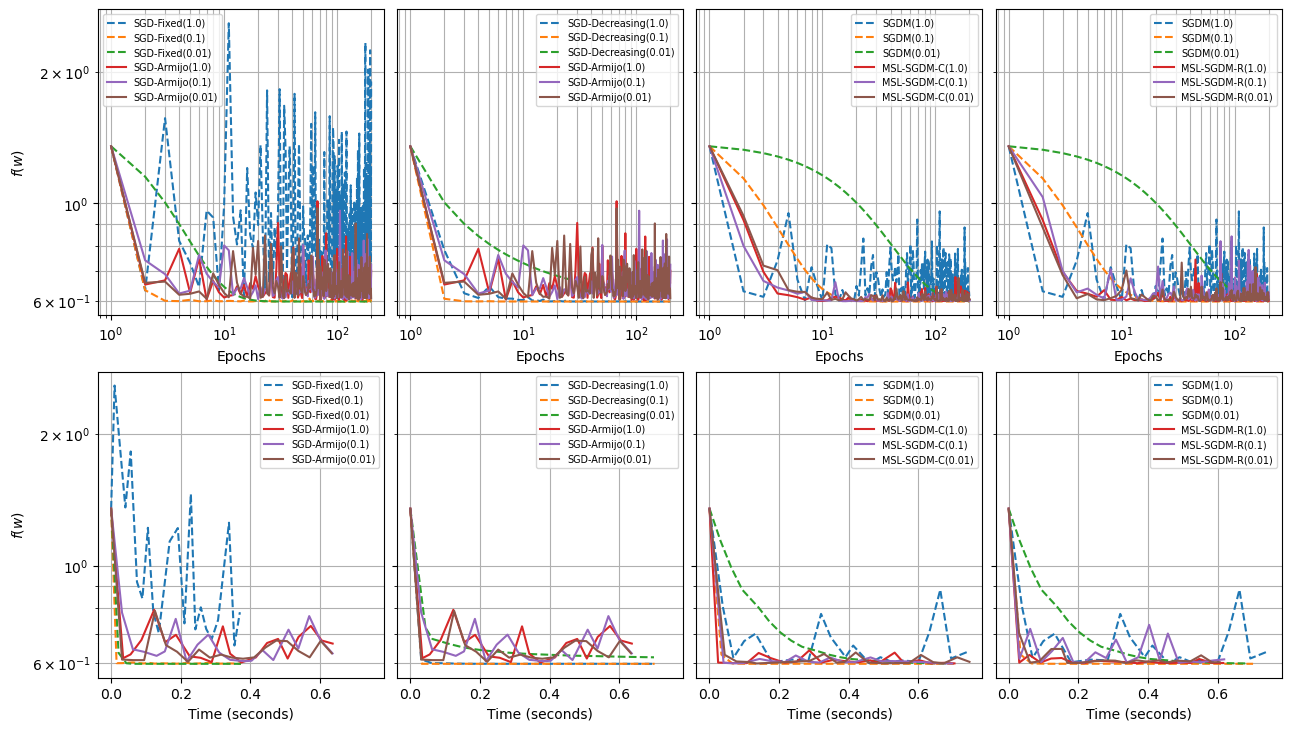

In [85]:
diagnostic([sgdfixed_german, sgddecre_german, sgdm_german, sgdarmijo_german, mslc_german, mslr_german]),
plt.savefig("./plots/german-diagnostic.pdf")